In [33]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X, y = joblib.load('../../preprocessing/clustering_data.joblib')

In [3]:
X.head()

,Sex,Age,Height,Weight,NOC,Games,Sport
0,0.0,0.226415,0.552083,0.291005,0.180995,0.0,0.111111
1,0.0,0.207547,0.447917,0.185185,0.180995,0.0,0.481481
2,1.0,0.169811,0.604167,0.301587,0.633484,1.0,0.777778
3,1.0,0.169811,0.604167,0.301587,0.633484,1.0,0.777778
4,1.0,0.245283,0.604167,0.301587,0.633484,1.0,0.777778


In [4]:
X.describe()

,Sex,Age,Height,Weight,NOC,Games,Sport
count,52266.000000,52266.000000,52266.000000,52266.000000,52266.000000,52266.000000,52266.000000
mean,0.308824,0.246609,0.505931,0.242785,0.482030,0.173248,0.412183
std,0.462013,0.104794,0.108470,0.075147,0.289824,0.378465,0.298473
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.169811,0.437500,0.190476,0.276018,0.000000,0.148148
50%,0.000000,0.226415,0.500000,0.238095,0.438914,0.000000,0.407407
75%,1.000000,0.301887,0.583333,0.285714,0.737557,0.000000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


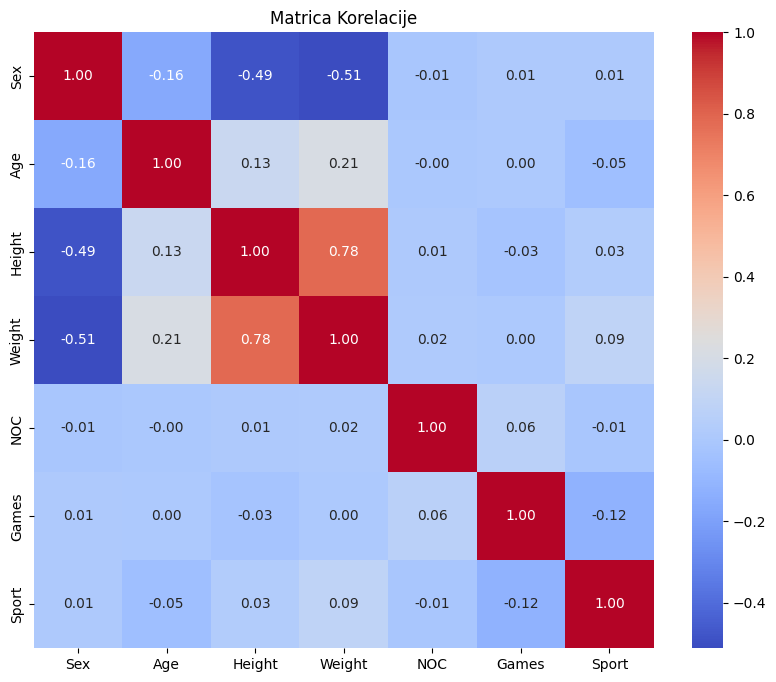

In [5]:
correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrica Korelacije')
plt.show()

Kolone NOC i Games ne utiču skoro uopšte na ostale kolone pa ih možemo izbaciti

In [6]:
X.drop(columns=['NOC', 'Games'], inplace=True)

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [9]:
from sklearn.metrics import silhouette_score

In [10]:
# ks = [i for i in range(2, 11)]

# fig, axs = plt.subplots(3, 3, figsize = (12, 12))
# fig.suptitle("Clustering with different k values")

# for k, ax in zip(ks, axs.flatten()):
#     kmeans = KMeans(n_clusters = k, n_init = 'auto', random_state = 22)
#     kmeans.fit(X)

#     ax.scatter(X_pca[:, 0], X_pca[:, 1], c = kmeans.labels_)
#     ax.set_title(f"clusters = {k}")
#     ax.set_xlabel("Pc1")
#     ax.set_ylabel("Pc2")

# plt.tight_layout()
# plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
#ac_model = AgglomerativeClustering(n_clusters = 2, linkage='single', compute_distances=True)

In [13]:
# ac_model.fit(X)

In [14]:
# ac_model.labels_

In [15]:
# ac_model.distances_

In [16]:
from sklearn.metrics import silhouette_score

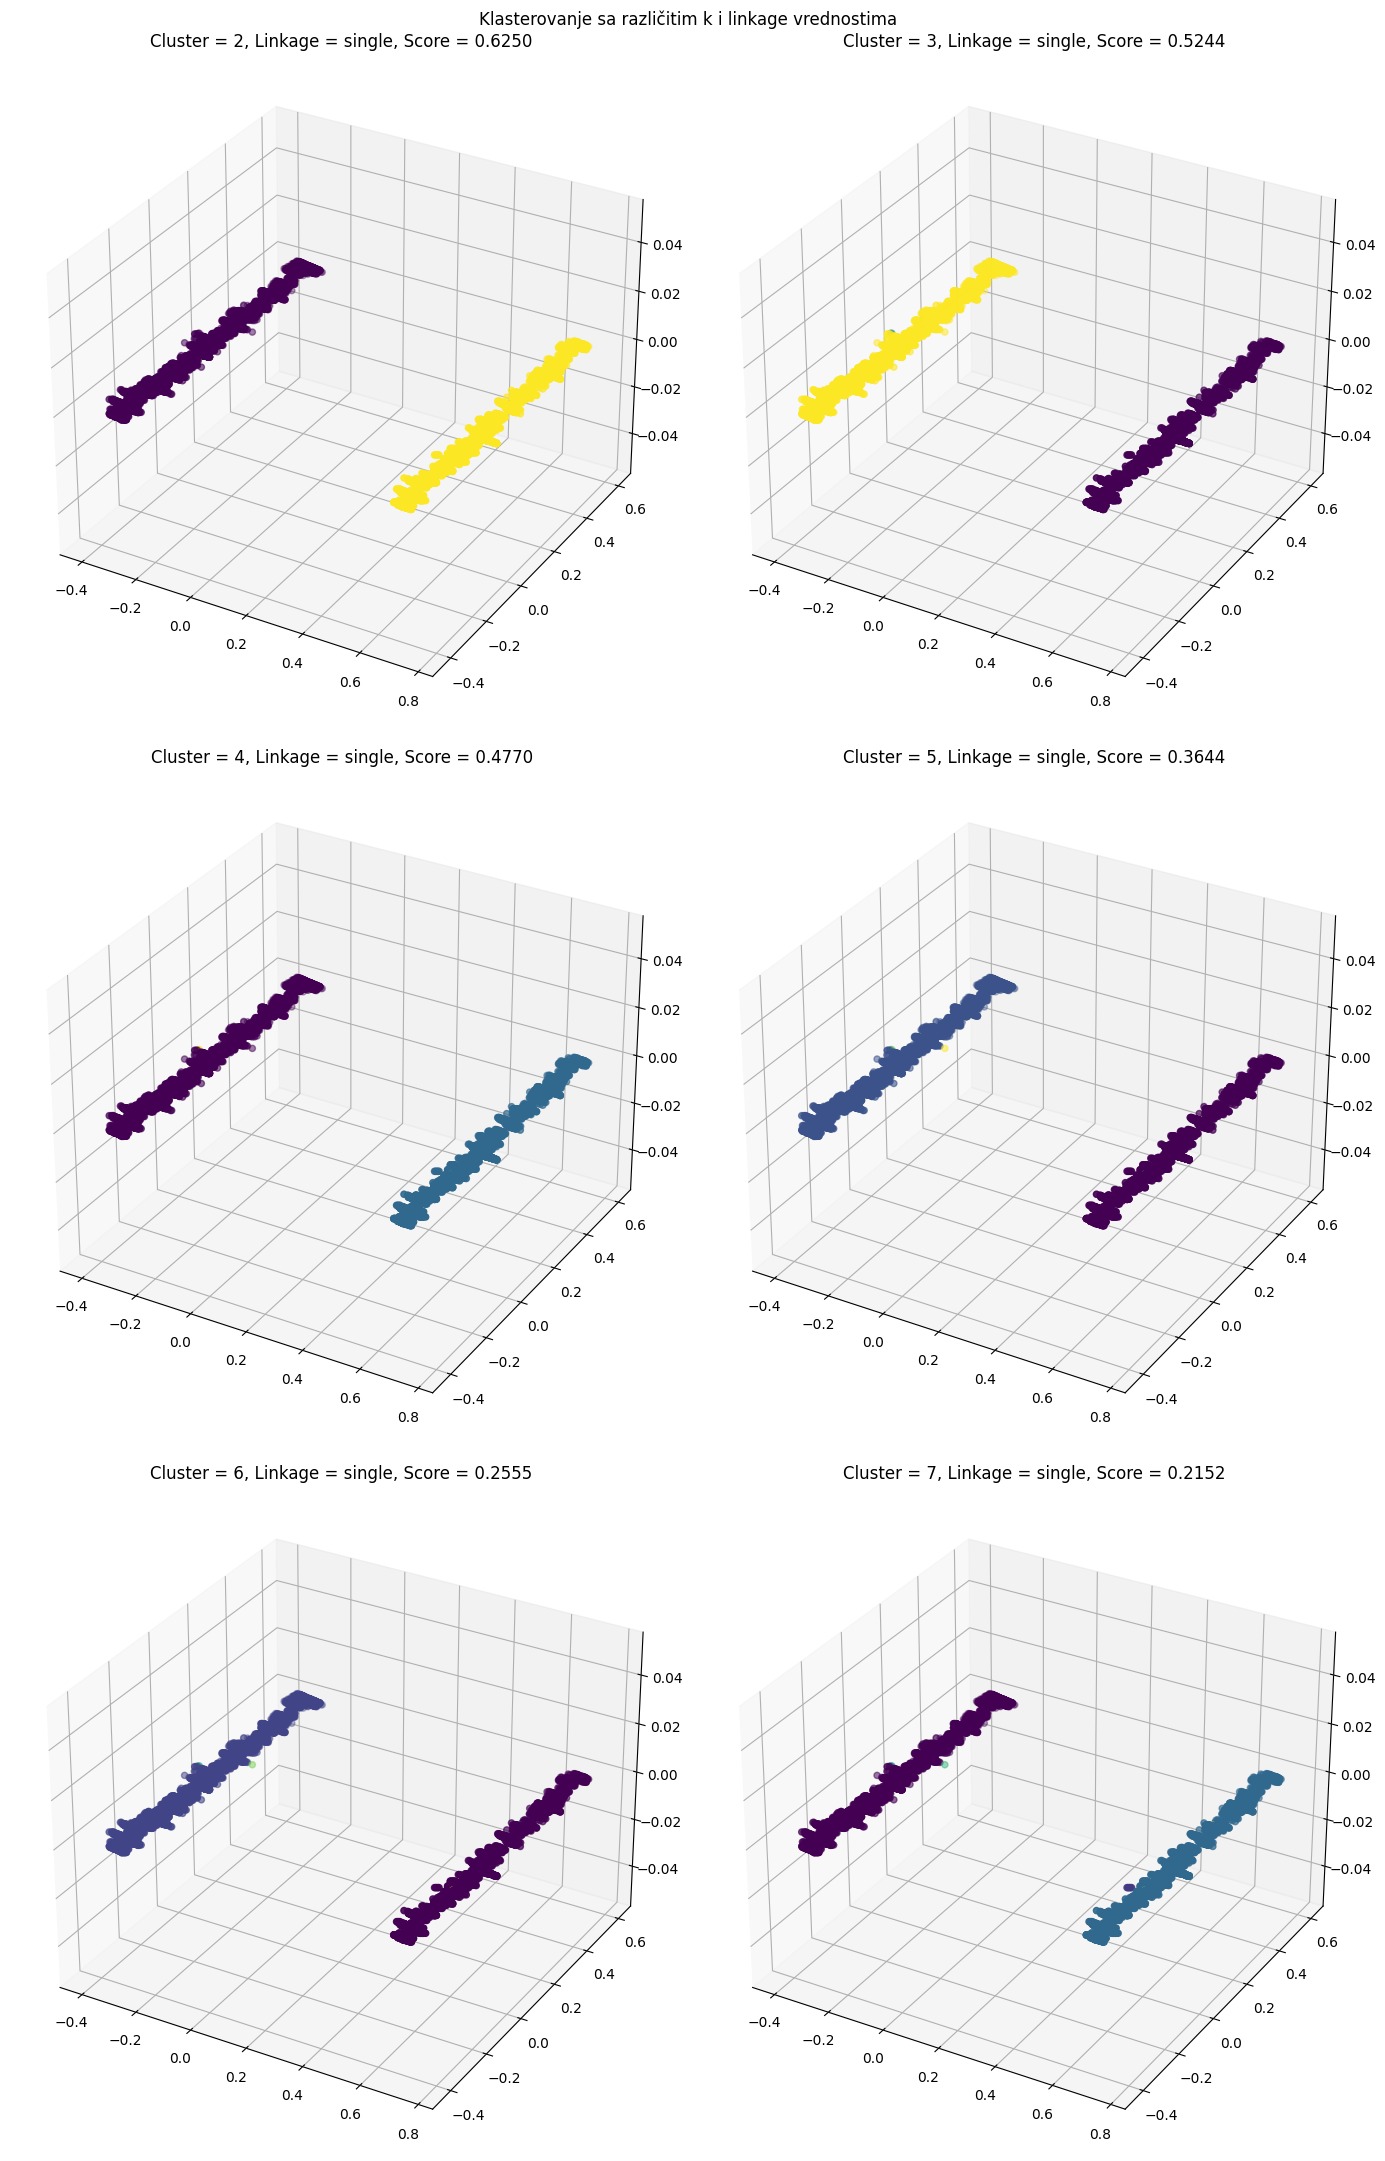

In [32]:
ks = range(2, 8)

best_ac_model = None
best_score = float('-inf')

silhouettes_ac = []

fig = plt.figure(figsize = (14, 22))

for i, cluster_num in enumerate(ks):
    ax = fig.add_subplot(3, 2, i + 1, projection='3d')

    model = AgglomerativeClustering(n_clusters = cluster_num, linkage = 'single', metric = 'euclidean')
    model.fit(X)
    score = silhouette_score(X, model.labels_)
    silhouettes_ac.append(score)
    
    labels = model.labels_

    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
    ax.set_title(f'\nCluster = {cluster_num}, Linkage = single, Score = {score:.4f}')

    if score > best_score:
        best_score = score
        best_ac_model = model

plt.suptitle("Klasterovanje sa različitim k i linkage vrednostima")
plt.tight_layout()
plt.show()

In [18]:
print(best_ac_model)

AgglomerativeClustering(linkage='single', metric='euclidean')


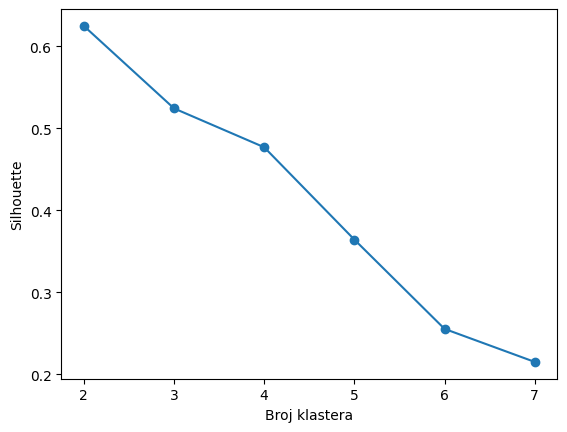

In [31]:
plt.plot(ks, silhouettes_ac, marker='o')
plt.xticks(ks)
plt.xlabel('Broj klastera')
plt.ylabel('Silhouette')

plt.show()

In [20]:
from sklearn.cluster import DBSCAN

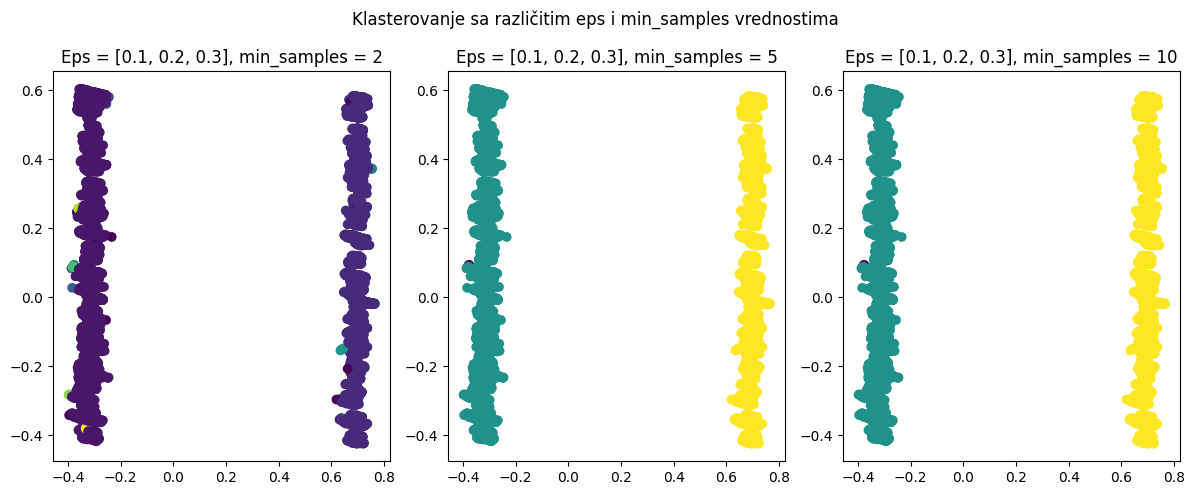

In [25]:
eps = [0.1, 0.2, 0.3]
min_samples = [2, 5, 10]

best_dbscan_model = None
best_score = float('-inf')

silhouettes_dbscan = []

fig, axs = plt.subplots(1, 3, figsize = (12, 5))
fig.suptitle("Klasterovanje sa različitim eps i min_samples vrednostima")

for e, m_s, a in zip(eps, min_samples, axs.flatten()):
    dbscan_model = DBSCAN(eps = e, min_samples=m_s)
    dbscan_model.fit(X)

    score = silhouette_score(X, dbscan_model.labels_)
    silhouettes_dbscan.append(score)
    
    a.scatter(X_pca[:, 0], X_pca[:, 1], c = dbscan_model.labels_)
    a.set_title(f"Eps = {eps}, min_samples = {m_s}")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    
    if score > best_score:
        best_score = score
        best_dbscan_model = dbscan_model

plt.tight_layout()
plt.show()

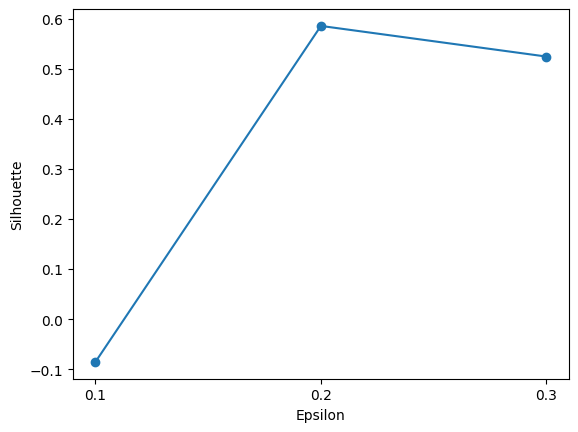

In [30]:
plt.plot(eps, silhouettes_dbscan, marker='o')
plt.xticks(eps)
plt.xlabel('Epsilon')
plt.ylabel('Silhouette')

plt.show()

In [27]:
print(best_dbscan_model)

DBSCAN(eps=0.2)


## Eksportovanje modela

In [28]:
joblib.dump((best_ac_model, best_dbscan_model, silhouettes_ac, silhouettes_dbscan), 'Agglomerative_DBSCAN.joblib')

['Agglomerative_DBSCAN.joblib']

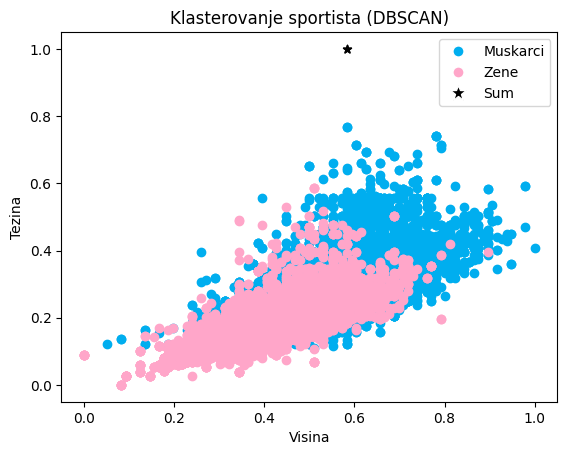

In [29]:
#podela na muskarce i zene

klaster = dbscan_model.labels_

muskarci = X[klaster == 0]
plt.scatter(muskarci['Height'], muskarci['Weight'], c = '#00AEEF', label='M')

zene = X[klaster == 1]
plt.scatter(zene['Height'], zene['Weight'], c = '#FFA6C9', label='Z')

shum = X[klaster == -1]
plt.scatter(shum['Height'], shum['Weight'], c='black', marker='*', label='Outliers')

plt.xlabel('Visina')
plt.ylabel('Tezina')
plt.title('Klasterovanje sportista (DBSCAN)')

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Muskarci', markerfacecolor='#00AEEF', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='Zene', markerfacecolor='#FFA6C9', markersize=8),
    plt.Line2D([0], [0], marker='*', color='w', label='Sum', markerfacecolor='black', markersize=12)
]

plt.legend(handles=legend_elements)
plt.show()